# Research Questions
1. When does the pairwise approximation deviate from the MiCRM?
    * High leakage and intransitive consumer preference structure.
2. What causes the decoherence between the MiCRM and its LV approximation?
    * Positive pairwise interaction terms lead to unstable solutions.
3. What do these deviations tell us about the underlying MiCRM?
    * Leakage is a poorly defined parameter, needs an upper bound and a more rigorous mechanistic definition.
    * Metabolic tradeoffs need to be considered when parametrising the MiCRM; uptake, respiration and leakage are not independent of each other.
4. How can we use pairwise modelling to better parametrise the MiCRM?
    * While going from a pairwise LV model to the MiCRM is not possible, the structure of the interaction terms is informative.

# Logical Structure of Dissertation

1. Given the minimal constraints on the MiCRM, in what region of the parameter space is the LV approximation valid?
    * Identify most influential parameters from analytical work.
    * Evaluate fit across two degrees of freedom: leakage and uptake matrix structure (measured through average niche incumbency).
    * Visualize relationships between parameter values and dynamical properties of both models.
2. Having zeroed in on when and why the approximation fails, consider biological implications/feasibility of such communities.
    * Leakage needs to be bounded through metabolic structure, and then some.
    * We need a better way to constrain MiCRM parameters, preferably using known patterns nutrient/energy fluxes in microbial communities.

# Results

## Looking at goodness of fit and stability


In [1]:
rm(list = ls())

setwd("C:/Users/micho/github/Thesis")

library(dplyr)
library(ggplot2)
library(tidyr)

df2 = read.csv("2x2.csv")
df3 = read.csv("3x3.csv")
df4 = read.csv("4x4.csv")
df5 = read.csv("5x5.csv")
df6 = read.csv("6x6.csv")
df7 = read.csv("7x7.csv")

df = rbind(df2, df3, df4, df5, df6, df7)

Q <- quantile(log(df$MSE), probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(log(df$MSE))

df_NOut <- subset(df, log(df$MSE) > (Q[1] - 1.5*iqr) & log(df$MSE) < (Q[2]+1.5*iqr))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Dominant eigenvalue of MiCRM increases with niche overlap and leakage

We define niche overlap (NO) as the average pairwise cosine similarity between consumer uptake vectors in the uptake matrix. Mathematically, this is calculated through the following equation.

\begin{equation}
NO = \frac{2}{N(N-1)} \sum_{i \neq j} cossim(\vec{u}_{i}, \vec{u}_{j})
\end{equation}

Where cossim is defined as:

\begin{equation}
cossim(\vec{x}, \vec{y}) = \frac{ \vec{x} \cdot \vec{y}}{ \lVert \vec{x} \rVert \lVert \vec{y} \rVert}
\end{equation}

NO gives us a measure of how much competition for common resources will occur in the mircobial community. From the simulations we can see that stability, as measured by the real part of the system's dominant eigenvalue, decreases as communities become more competititve.

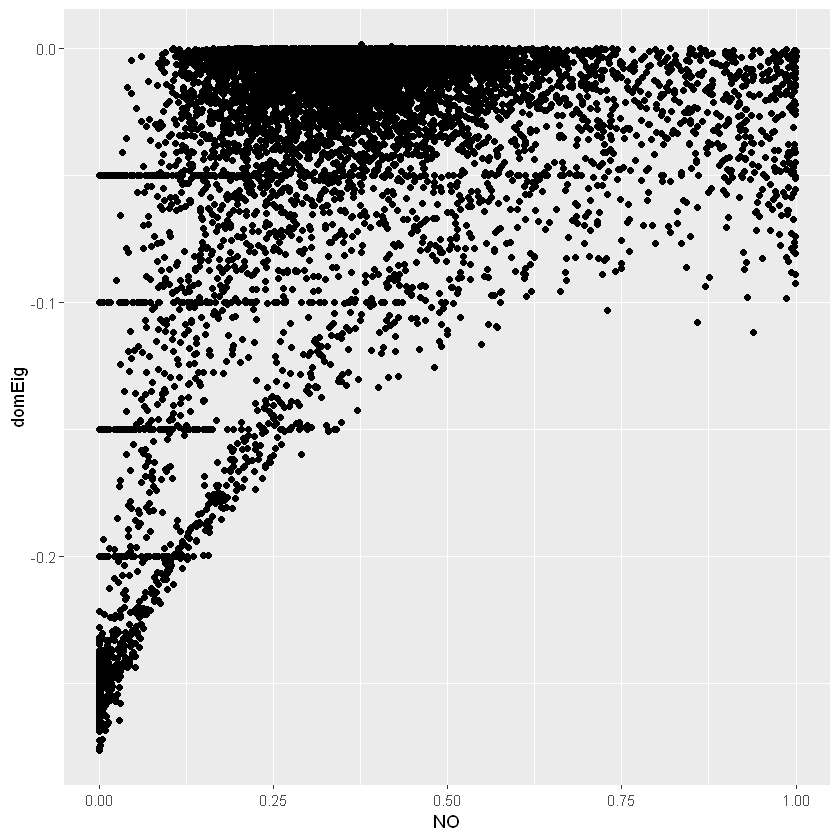

In [3]:
ggplot(data=df_NOut, aes(y=domEig, x = NO)) + geom_point()

In a similar vein, the distribution of the dominant eigenvalues becomes less negative with increasing amounts of community-wide leakage.

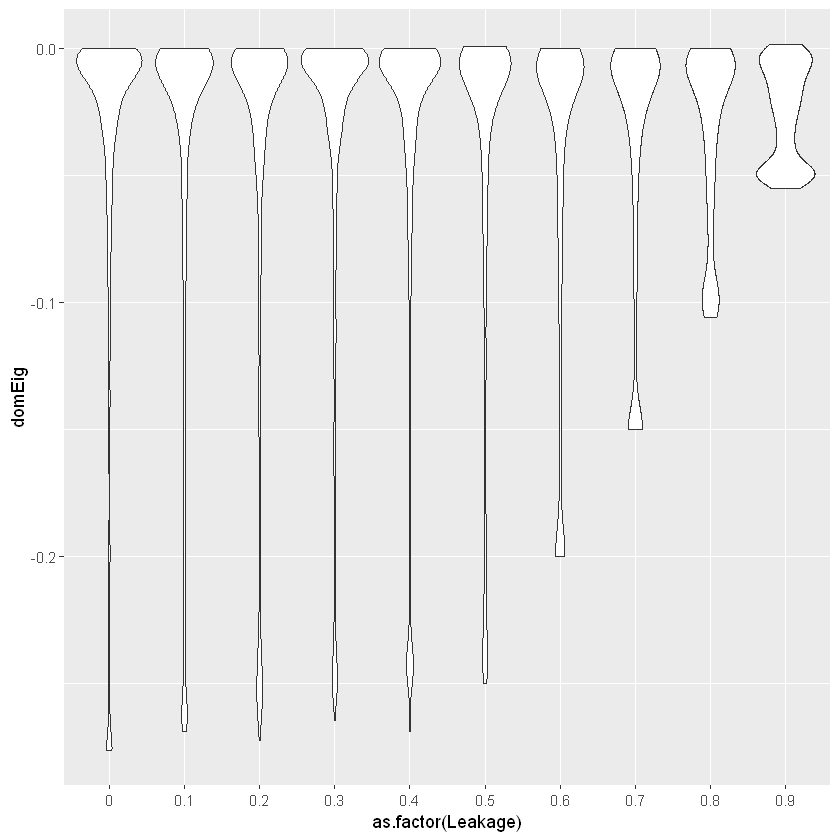

In [4]:
ggplot(data=df_NOut, aes(y=domEig, x = as.factor(Leakage))) + geom_violin()

### Time to equilibrium increases with niche incumbency and leakage

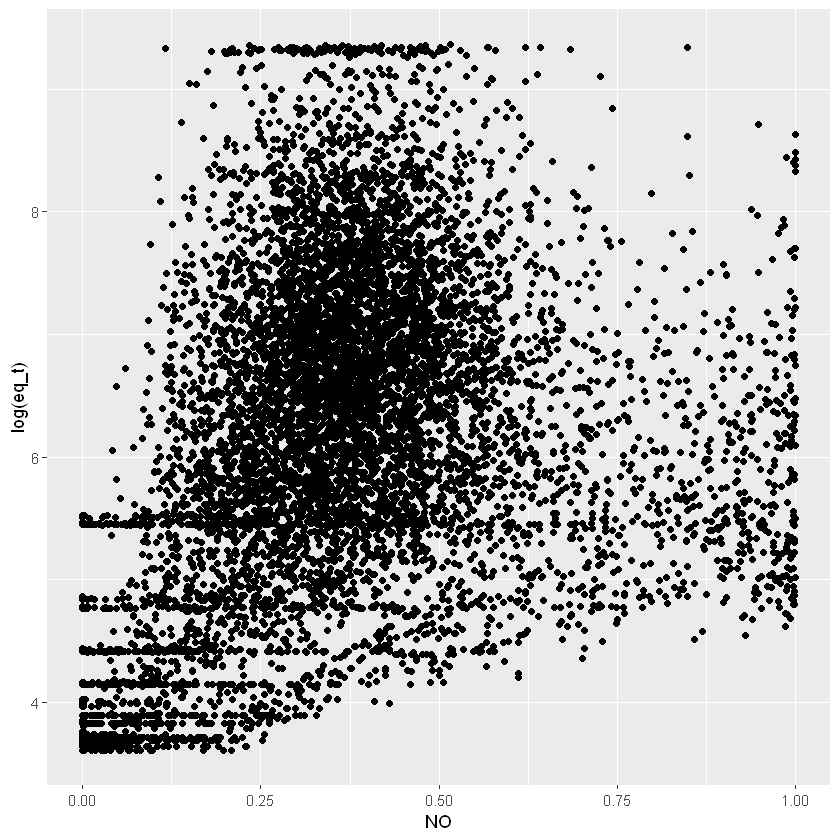

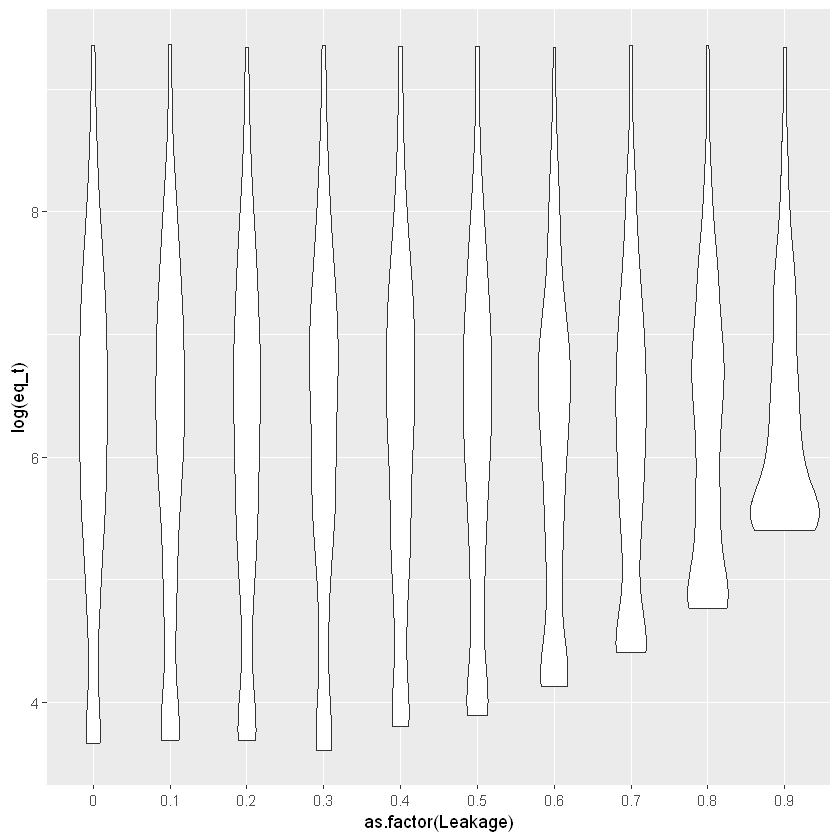

In [11]:

ggplot(data=df, aes(y=log(eq_t), x = NO)) + geom_point()

ggplot(data=df, aes(y=log(eq_t), x = as.factor(Leakage))) + geom_violin()

### Mean squared error increases with leakage
There is a clear relationship between the mean squared error of the pairwise approximation along the trajectory and at equilibrium with community-wide leakage.

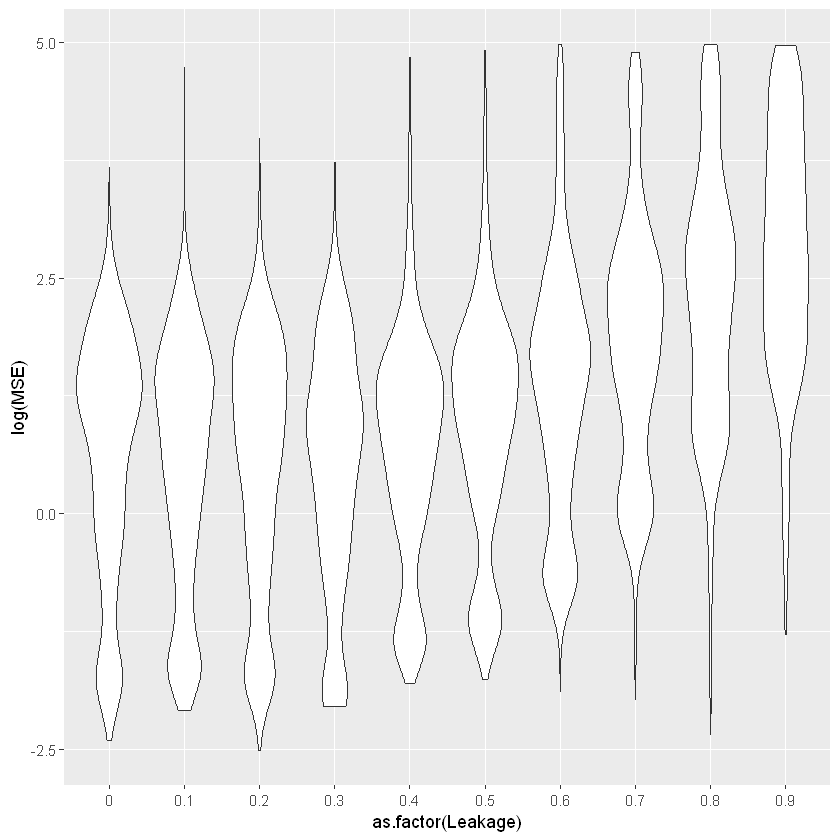

In [8]:

ggplot(data=df_NOut, aes(y=log(MSE), x=as.factor(Leakage))) + geom_violin()

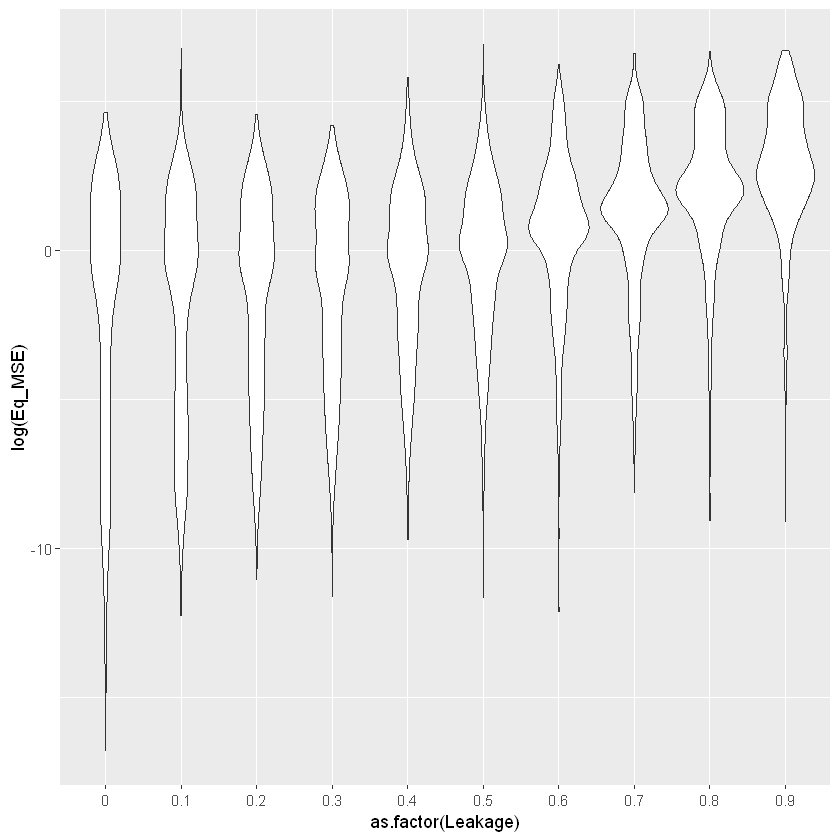

In [7]:
ggplot(data=df_NOut, aes(y=log(Eq_MSE), x=as.factor(Leakage))) + geom_violin()

## Mean Squared error increases with niche overlap

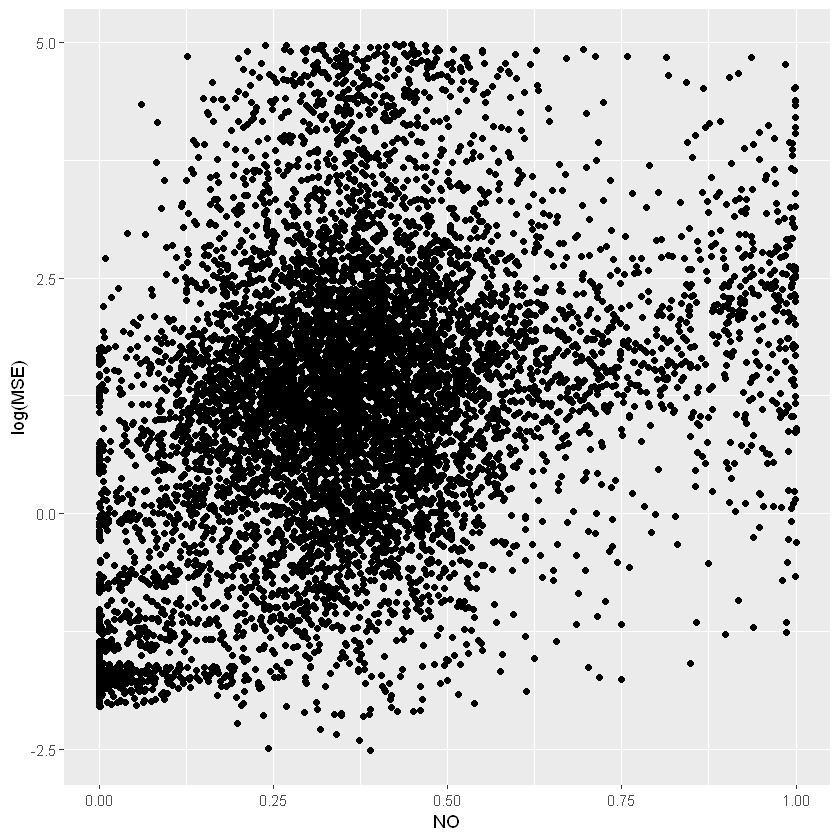

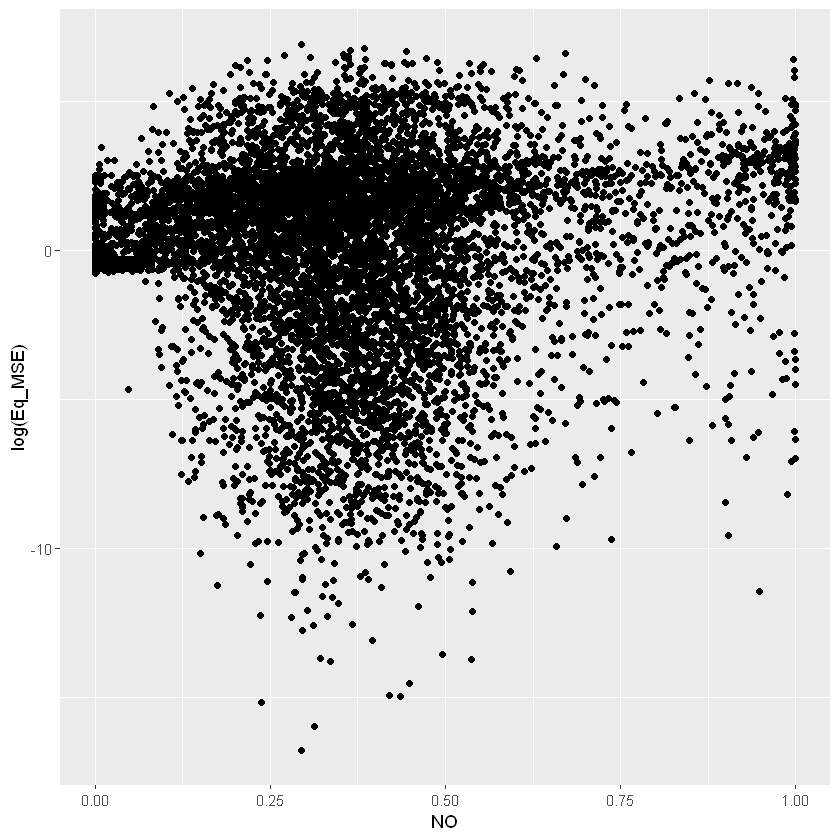

In [13]:
ggplot(data=df_NOut, aes(y=log(MSE), x=NO)) + geom_point()

ggplot(data=df_NOut, aes(y=log(Eq_MSE), x=NO)) + geom_point()